## рандомное равномерное разбиение

In [57]:
import numpy as np
step = 0.05
numer = 10/step
X_func = np.linspace(0, 10, int(numer))
X = []
for i in range(len(X_func)):
    X.append((X_func[i - 1] + X_func[i]) / 2)

In [58]:
Y_func = []
for i in range(len(X_func)):
    Y_func.append(np.cos((np.exp(X_func[i]/3))/10))

In [91]:
poly = []
for k in range(50, 150):
    result = 0
    for i in range(len(X_func)):
        tmp = 1
        for j in range(len(X_func)):
            if i != j:
                tmp *= (X[k] - X_func[j]) / (X_func[i] - X_func[j])
        result += Y_func[i]*tmp
    poly.append(result)
X_new = []
for i in range(50, 150): #здесь просто подгоняем колтчество переменных для интерполяционного графика, потому что на краях очень скачет
    X_new.append(X_func[i])

print(len(X_func))
print(len(X))
print(len(X_new))
print(len(Y_func))
print(len(poly))

200
200
100
200
100


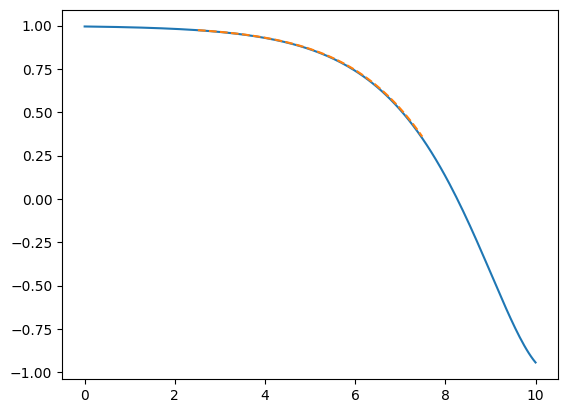

In [92]:

import matplotlib.pyplot as plt
plt.plot(X_func, Y_func)
plt.plot(X_new, poly, linestyle = '--')

plt.show()


In [93]:
#Погрешность 
pogreshnost = []
for i in range(len(poly)):
    pogreshnost.append(abs(poly[i]-Y_func[i]))
max(pogreshnost)

0.5057855467382639

## распределение с полиномом Чебышева

In [94]:
a, b = 0, 10  
n = 200
x = np.linspace(a, b, 200) 
k = np.arange(1, n + 1)

In [95]:
x_cheb = np.cos((2 * k - 1) / (2 * n) * np.pi)  
xi = 0.5 * (a + b) + 0.5 * (b - a) * x_cheb
xi

array([9.99984579e+00, 9.99861215e+00, 9.99614518e+00, 9.99244549e+00,
       9.98751398e+00, 9.98135188e+00, 9.97396071e+00, 9.96534228e+00,
       9.95549874e+00, 9.94443249e+00, 9.93214629e+00, 9.91864314e+00,
       9.90392640e+00, 9.88799969e+00, 9.87086693e+00, 9.85253237e+00,
       9.83300051e+00, 9.81227618e+00, 9.79036450e+00, 9.76727086e+00,
       9.74300097e+00, 9.71756082e+00, 9.69095668e+00, 9.66319512e+00,
       9.63428298e+00, 9.60422740e+00, 9.57303580e+00, 9.54071587e+00,
       9.50727559e+00, 9.47272320e+00, 9.43706724e+00, 9.40031649e+00,
       9.36248004e+00, 9.32356720e+00, 9.28358759e+00, 9.24255107e+00,
       9.20046777e+00, 9.15734806e+00, 9.11320259e+00, 9.06804225e+00,
       9.02187818e+00, 8.97472177e+00, 8.92658465e+00, 8.87747872e+00,
       8.82741607e+00, 8.77640906e+00, 8.72447028e+00, 8.67161255e+00,
       8.61784890e+00, 8.56319259e+00, 8.50765713e+00, 8.45125620e+00,
       8.39400373e+00, 8.33591383e+00, 8.27700085e+00, 8.21727932e+00,
      

In [96]:
def f(x):
    return np.cos(np.exp(x/3)/10) 
yi = f(xi)

In [97]:
def lagrange(x, xi):       
    lagr = []
    for k in range(len(xi)): 
        result = 0
        for i in range(len(xi)):
            tmp = 1
            for j in range(len(xi)):
                if i != j:
                    tmp *= (x[k] - xi[j]) / (xi[i] - xi[j])
            result += yi[i]*tmp
        lagr.append(result)
    return lagr
arr = lagrange(x, xi)

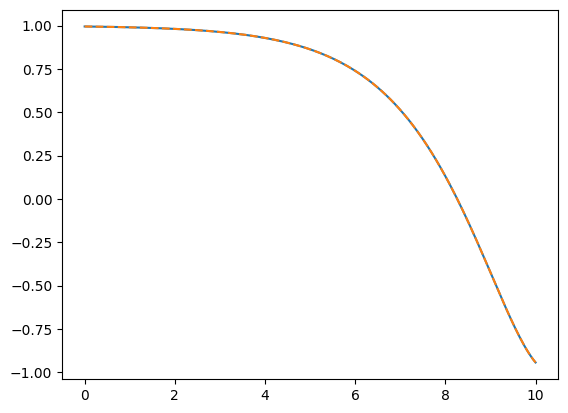

In [98]:
plt.plot(x, f(x))
plt.plot(x, lagrange(x, xi), linestyle="--")
plt.show()


In [99]:
#погрешность 
pogreshnost1 = []
for i in range(len(yi)):
    pogreshnost1.append(abs(yi[i] - arr[i]))
max(pogreshnost1)

1.938280675724274